In [ ]:
!git clone https://github.com/kohya-ss/sd-scripts

In [ ]:
%cd sd-scripts

/content/sd-scripts


In [ ]:
!pip install -r requirements.txt

In [ ]:
!apt-get update
!apt-get install -y unrar

In [ ]:
!unrar x /content/training_data.rar

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "sd-legacy/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    safety_checker=None,
    cache_dir="/root/.cache/huggingface"  # reuse cache
).to("cuda")


In [ ]:
!accelerate launch train_network.py \
 --pretrained_model_name_or_path="sd-legacy/stable-diffusion-v1-5" \
 --train_data_dir="training_data" \
 --resolution=512,512 \
 --enable_bucket \
 --min_bucket_reso=256 \
 --max_bucket_reso=1024 \
 --output_dir="/content/lora_output" \
 --output_name="vangogh_lora" \
 --save_model_as=safetensors \
 --network_module=networks.lora \
 --network_dim=16 \
 --network_alpha=16 \
 --learning_rate=1e-4 \
 --optimizer_type="AdamW8bit" \
 --lr_scheduler="constant" \
 --sdpa \
 --max_train_epochs=10 \
 --save_every_n_epochs=1 \
 --mixed_precision="fp16" \
 --gradient_checkpointing

In [ ]:
pipe.load_lora_weights(
    "/content/lora_output",
    weight_name="vangogh_lora.safetensors"
)

  0%|          | 0/30 [00:00<?, ?it/s]

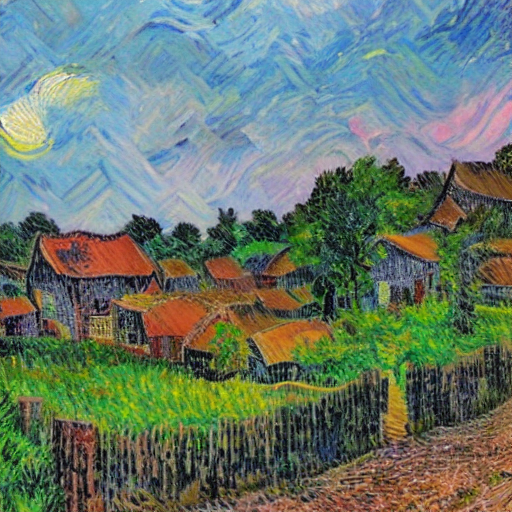

In [ ]:
image = pipe(
    "<vangogh> oil painting of a village at sunset",
    num_inference_steps=30,
    guidance_scale=7.5
).images[0]

image


  0%|          | 0/30 [00:00<?, ?it/s]

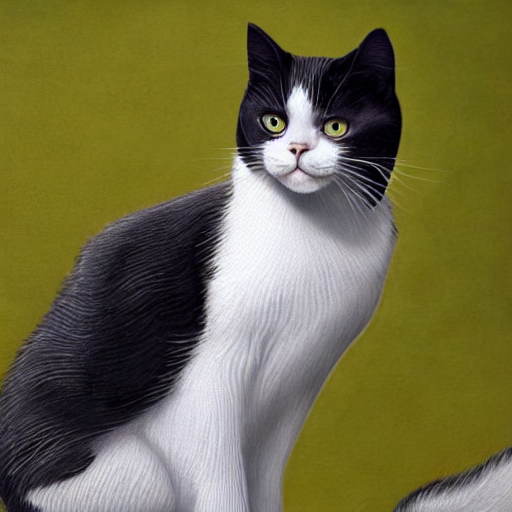

In [ ]:
image = pipe(
    "a cat",
    num_inference_steps=30,
    guidance_scale=7.5
).images[0]

image


  0%|          | 0/30 [00:00<?, ?it/s]

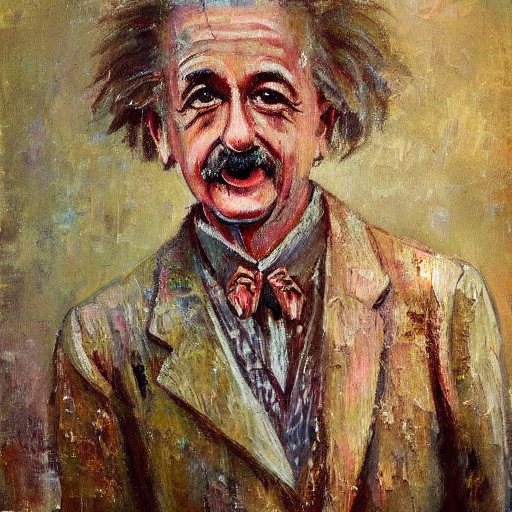

In [ ]:
image = pipe(
    "Albert Einstein painting",
    num_inference_steps=30,
    guidance_scale=7.5
).images[0]

image
